# **Transfer Learning with Pre-trained Models**

In [ ]:
#importing required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import accuracy_score
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torchvision


In [ ]:
# loading dataset
zip_path = '/content/food-dataset.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/food-dataset')

extracted_folder = '/content/food-dataset'
print("Extracted folders:", os.listdir(extracted_folder))

Extracted folders: ['validation', 'training', 'evaluation']


In [ ]:
train_path = '/content/food-dataset/training'
validation_path = '/content/food-dataset/validation'
evaluation_path = '/content/food-dataset/evaluation'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(330),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = datasets.ImageFolder(train_path, transform=train_transform)
val_dataset = datasets.ImageFolder(validation_path, transform=val_transform)
test_dataset = datasets.ImageFolder(evaluation_path, transform=val_transform)



In [ ]:
# Print dataset information
print("Dataset Information:")
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Class names: {train_dataset.classes}")

Dataset Information:
Number of training samples: 9866
Number of validation samples: 3430
Number of test samples: 3347
Number of classes: 11
Class names: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [ ]:
# data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_classes = 11

In [ ]:
# class distribution in the training set
class_counts = {class_name: 0 for class_name in train_dataset.classes}
for _, label in train_dataset:
    class_name = train_dataset.classes[label]
    class_counts[class_name] += 1

print("\nClass distribution in the training set:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")



Class distribution in the training set:
Bread: 994 samples
Dairy product: 429 samples
Dessert: 1500 samples
Egg: 986 samples
Fried food: 848 samples
Meat: 1325 samples
Noodles-Pasta: 440 samples
Rice: 280 samples
Seafood: 855 samples
Soup: 1500 samples
Vegetable-Fruit: 709 samples


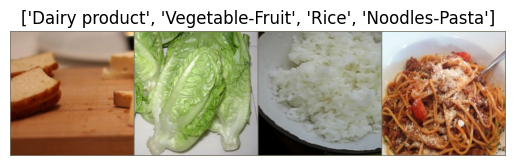

In [ ]:
# Sample images from the training set
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
inputs, classes = next(iter(train_loader))

out = torchvision.utils.make_grid(inputs)
imshow(out, title=[train_dataset.classes[x] for x in classes])

## **Justification of Model Choices**

I chose following three pre-trained models: Inception V3, MobileNet V3, and ShuffleNet.Each model has architectural advantages that make them capable of solving image classification issues like the Food-11 dataset.

**Inception V3:**


*   Architectural Strength: Inception V3 allows the model to capture features at different scales by using filters of different sizes in parallel. This makes it very efficient for complex image classification.
*   Suitability: Food-11 dataset includes images of foods that are with varying textures, shapes, and scales. Inception V3's ability to handle multi-scale features makes it best for this task.


**MobileNet V3:**

*   Architectural Strength: MobileNet V3 is designed for light-weight deployment and efficiency. It utilizes depthwise separable convolutions and squeeze-and-excitation blocks to reduce computation cost while maintaining good accuracy.
*   Suitability: MobileNet V3 is most appropriate for applications with limited computational capacity, i.e., mobile or edge devices. Despite its lightness, it can achieve comparable performance on image classification tasks like Food-11.

**ShuffleNet:**

*   Architectural Strength: ShuffleNet introduces channel shuffling to improve information flow between convolutional layers. It also uses group convolutions to reduce computational complexity.
*   Suitability: ShuffleNet is yet another lightweight model that has a balance between accuracy and efficiency. It is particularly well-suited to applications in which model size and inference speed are critical e.g., real-time use.









In [ ]:
#Inception V3
inception = models.inception_v3(pretrained=True)

inception.fc = nn.Linear(inception.fc.in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inception = inception.to(device)

In [ ]:
#MobileNet V3
mobilenet = models.mobilenet_v3_large(pretrained=True)

mobilenet.classifier[3] = nn.Linear(mobilenet.classifier[3].in_features, num_classes)

mobilenet = mobilenet.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 74.7MB/s]


In [ ]:
# ShuffleNet
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)

shufflenet.fc = nn.Linear(shufflenet.fc.in_features, num_classes)

shufflenet = shufflenet.to(device)

## **Training function**

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    epoch_times = []

    best_val_accuracy = 0.0

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            if isinstance(outputs, torch.Tensor):
                loss = criterion(outputs, labels)
                preds = outputs
            else:
                loss = criterion(outputs.logits, labels)
                preds = outputs.logits

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(preds, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)

                if isinstance(outputs, torch.Tensor):
                    loss = criterion(outputs, labels)
                    preds = outputs
                else:
                    loss = criterion(outputs.logits, labels)
                    preds = outputs.logits

                val_loss += loss.item()
                _, predicted = torch.max(preds, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = correct_val / total_val
        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        epoch_time = time.time() - start_time
        epoch_times.append(epoch_time)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f},Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f},Time per Epoch: {epoch_time:.2f} seconds")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), f"best_{model.__class__.__name__}.pth")

    print(f"Best Validation Accuracy: {best_val_accuracy}")

    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, epoch_times)

    return train_losses, val_losses, train_accuracies, val_accuracies, epoch_times

## **Plot functions**

In [ ]:
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, epoch_times):
    epochs = range(1, len(train_losses) + 1)

    # loss plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot Time per Epoch
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, epoch_times, label='Time per Epoch', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Time (seconds)')
    plt.title('Time per Epoch')
    plt.legend()
    plt.show()

## **Evaluate function**

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    test_preds, test_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            if isinstance(outputs, torch.Tensor):
                preds = outputs
            else:
                preds = outputs.logits
            _, predicted = torch.max(preds, 1)
            test_preds.extend(predicted.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    test_accuracy = accuracy_score(test_labels, test_preds)
    return test_accuracy

In [ ]:
criterion = nn.CrossEntropyLoss()


## **Inception V3**

Epoch 1/5
Train Loss: 0.7080, Train Accuracy: 0.7780,Val Loss: 0.6856, Val Accuracy: 0.8429,Time per Epoch: 277.58 seconds
Epoch 2/5
Train Loss: 0.6962, Train Accuracy: 0.7810,Val Loss: 0.7151, Val Accuracy: 0.8519,Time per Epoch: 277.33 seconds
Epoch 3/5
Train Loss: 0.6926, Train Accuracy: 0.7830,Val Loss: 0.7600, Val Accuracy: 0.8402,Time per Epoch: 276.08 seconds
Epoch 4/5
Train Loss: 0.6679, Train Accuracy: 0.7923,Val Loss: 0.4922, Val Accuracy: 0.8755,Time per Epoch: 278.75 seconds
Epoch 5/5
Train Loss: 0.6442, Train Accuracy: 0.8002,Val Loss: 0.6751, Val Accuracy: 0.8525,Time per Epoch: 277.98 seconds
Best Validation Accuracy: 0.8755102040816326


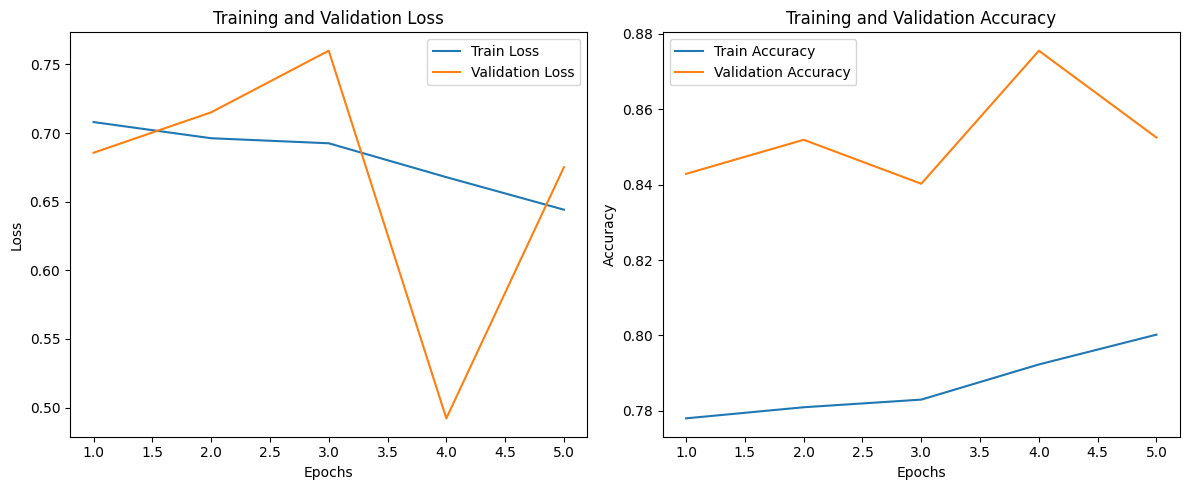

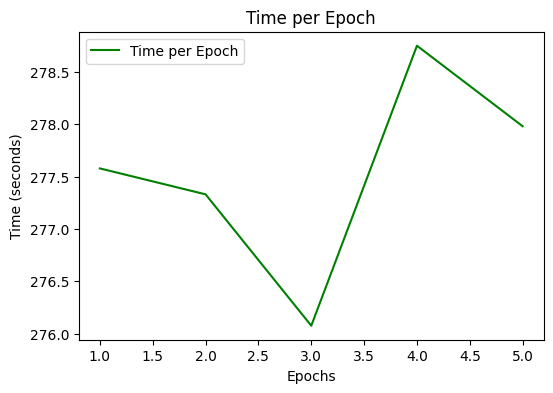

In [ ]:
optimizer_inception = optim.Adam(inception.parameters(), lr=0.0001)
train_losses_inception, val_losses_inception, train_accuracies_inception, val_accuracies_inception, epoch_times_inception = train_model(
    inception, train_loader, val_loader, criterion, optimizer_inception, num_epochs=5
)

In [ ]:
inception_accuracy = evaluate_model(inception, test_loader)
print(f"Inception V3 Test Accuracy: {inception_accuracy * 100:.2f}%")

Inception V3 Test Accuracy: 87.75%


## **MobileNet V3**

Epoch 1/5
Train Loss: 1.1746, Train Accuracy: 0.6100,Val Loss: 0.6484, Val Accuracy: 0.8032,Time per Epoch: 164.27 seconds
Epoch 2/5
Train Loss: 0.8655, Train Accuracy: 0.7202,Val Loss: 0.4873, Val Accuracy: 0.8522,Time per Epoch: 164.48 seconds
Epoch 3/5
Train Loss: 0.7785, Train Accuracy: 0.7491,Val Loss: 0.4948, Val Accuracy: 0.8472,Time per Epoch: 164.64 seconds
Epoch 4/5
Train Loss: 0.7028, Train Accuracy: 0.7740,Val Loss: 0.4611, Val Accuracy: 0.8665,Time per Epoch: 163.47 seconds
Epoch 5/5
Train Loss: 0.6475, Train Accuracy: 0.7922,Val Loss: 0.4382, Val Accuracy: 0.8700,Time per Epoch: 162.58 seconds
Best Validation Accuracy: 0.8699708454810495


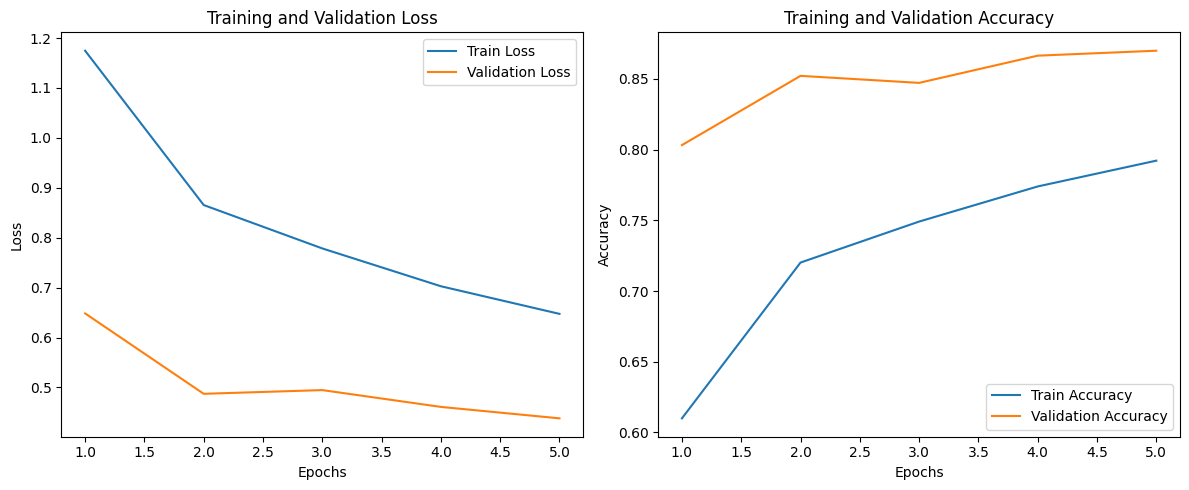

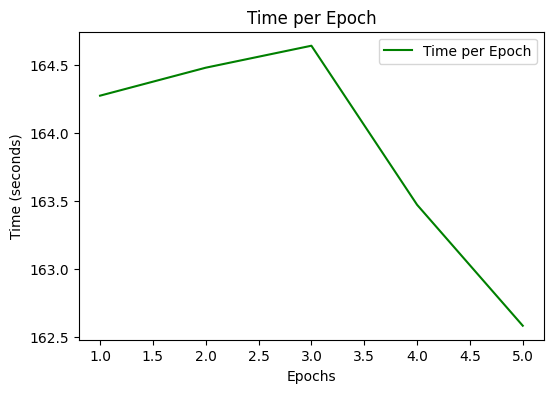

In [ ]:
optimizer_mobilenet = optim.Adam(mobilenet.parameters(), lr=0.0001)
train_losses_mobilenet, val_losses_mobilenet, train_accuracies_mobilenet, val_accuracies_mobilenet, epoch_times_mobilenet = train_model(
    mobilenet, train_loader, val_loader, criterion, optimizer_mobilenet, num_epochs=5
)

In [ ]:
mobilenet_accuracy =evaluate_model(mobilenet, test_loader)
print(f"MobileNet V3 Test Accuracy: {mobilenet_accuracy * 100:.2f}%")

MobileNet V3 Test Accuracy: 89.03%


## **ShuffleNet**

Epoch 1/5
Train Loss: 1.8940, Train Accuracy: 0.3715,Val Loss: 1.1032, Val Accuracy: 0.6257,Time per Epoch: 151.34 seconds
Epoch 2/5
Train Loss: 1.3513, Train Accuracy: 0.5621,Val Loss: 0.7346, Val Accuracy: 0.7729,Time per Epoch: 152.44 seconds
Epoch 3/5
Train Loss: 1.1022, Train Accuracy: 0.6565,Val Loss: 0.6124, Val Accuracy: 0.8076,Time per Epoch: 152.57 seconds
Epoch 4/5
Train Loss: 0.9954, Train Accuracy: 0.6922,Val Loss: 0.5007, Val Accuracy: 0.8437,Time per Epoch: 154.49 seconds
Epoch 5/5
Train Loss: 0.9231, Train Accuracy: 0.7065,Val Loss: 0.5248, Val Accuracy: 0.8385,Time per Epoch: 154.14 seconds
Best Validation Accuracy: 0.8437317784256559


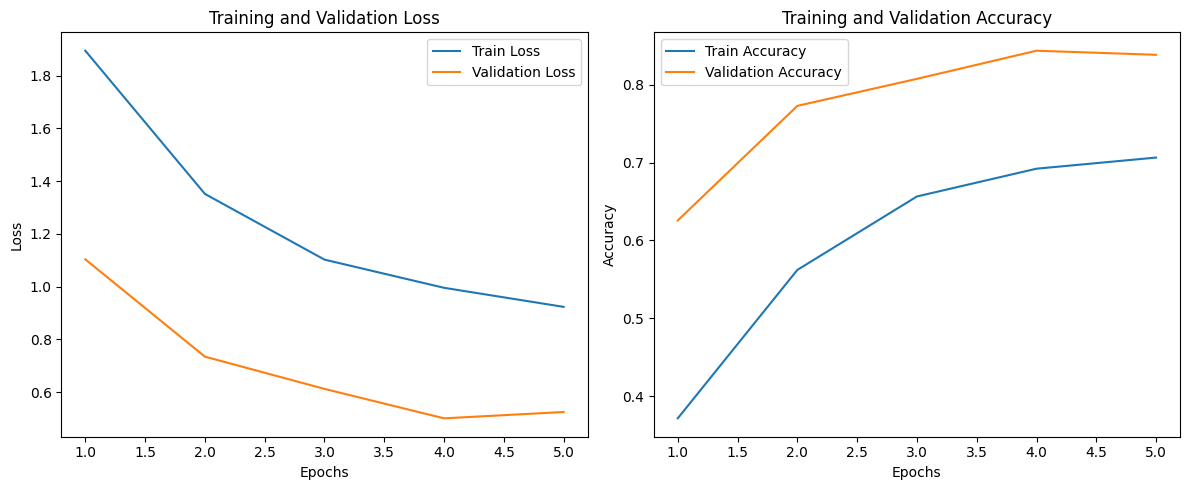

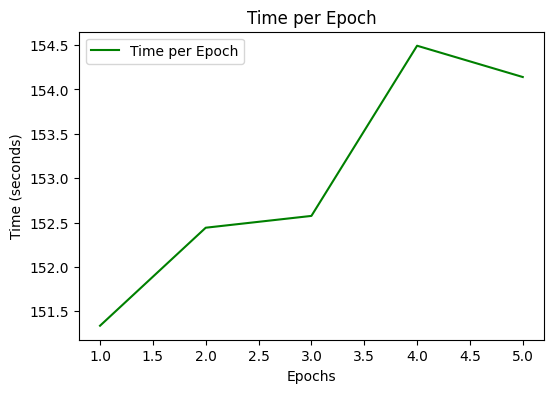

In [ ]:
optimizer_shufflenet = optim.Adam(shufflenet.parameters(), lr=0.0001)
train_losses_shufflenet, val_losses_shufflenet, train_accuracies_shufflenet, val_accuracies_shufflenet, epoch_times_shufflenet = train_model(
    shufflenet, train_loader, val_loader, criterion, optimizer_shufflenet, num_epochs=5
)

In [ ]:
shufflenet_accuracy = evaluate_model(shufflenet, test_loader)
print(f"ShuffleNet Test Accuracy: {shufflenet_accuracy * 100:.2f}%")

ShuffleNet Test Accuracy: 85.42%


### **Test accuracy Comparision plot**

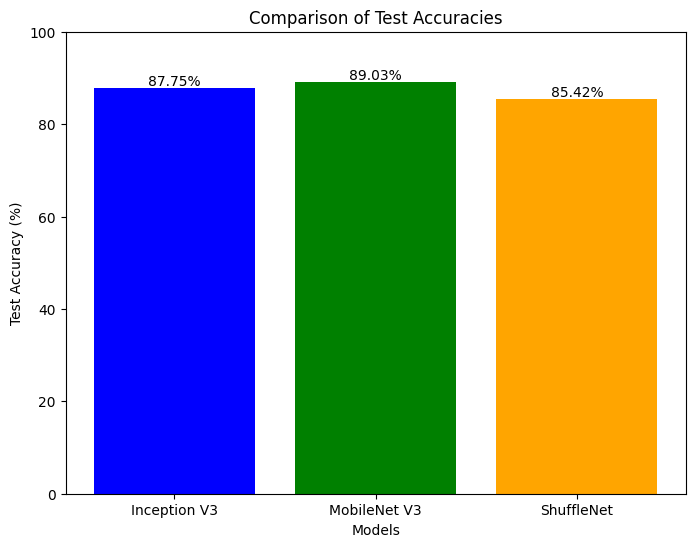

In [ ]:
models = ['Inception V3', 'MobileNet V3', 'ShuffleNet']
accuracies = [inception_accuracy * 100, mobilenet_accuracy * 100, shufflenet_accuracy * 100]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%',
             ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Test Accuracy (%)')
plt.title('Comparison of Test Accuracies')
plt.ylim(0, 100)
plt.show()

#### **Compare the results obtained with the different pre-trained models.Discuss which model performed best and analyze the reasons for the observed differences in performance.**

**Comparision of results**

After fine-tuning and evaluating the three models, test accuracies of each model are:

*   Inception V3 : 87.75%
*   MobileNet V3 : 89.03%
*   ShuffleNet : 85.42%

MobileNet V3 achieved the highest test accuracy (89.03%), followed by Inception V3 (87.75%) and ShuffleNet (85.42%).

**Analysis of Performance Differences**

1. MobileNet V3

*  Performance: MobileNet V3 outperformed the other models with a test accuracy of 89.03%. It also achieved the highest validation accuracy (87.00%) during training.


*  Efficient Architecture: MobileNet V3 is designed with depthwise separable convolutions and squeeze-and-excitation blocks, which reduce computational complexity while maintaining strong feature extraction capabilities.

*   Optimized for Mobile Devices: Despite being lightweight, MobileNet V3 leverages advanced techniques like hard-swish activations and neural architecture search (NAS) to achieve high accuracy.

*  Faster Convergence: MobileNet V3 showed faster convergence during training, as evidenced by its lower training and validation losses compared to the other models.


2. Inception V3


*   Performance: Inception V3 achieved a test accuracy of 87.75%, which is slightly lower than MobileNet V3 but still competitive.

*  Multi-Scale Feature Extraction: Inception V3's Inception modules allow it to capture features at multiple scales, making it effective for complex datasets like Food-11.
*  Deeper Architecture: The model's depth enables it to learn more complex patterns, but this also makes it computationally expensive.

*   Slower Training: Inception V3 took significantly longer to train (approximately 277 seconds per epoch) compared to MobileNet V3 and ShuffleNet, which may have limited its ability to fine-tune further.

3. ShuffleNet

*   Performance: ShuffleNet achieved the lowest test accuracy (85.42%) among the three models.

*   Lightweight Design: ShuffleNet's use of channel shuffling and group convolutions makes it highly efficient but may limit its ability to capture fine-grained features in complex datasets.

*   Slower Convergence: ShuffleNet had higher training and validation losses compared to the other models, indicating slower convergence during training.

*   Trade-Off Between Efficiency and Accuracy: While ShuffleNet is the most lightweight and fastest model (approximately 153 seconds per epoch), its accuracy is lower compared to MobileNet V3 and Inception V3.



**Key Takeaways**

*   MobileNet V3's combination of efficiency and accuracy makes it the best-performing model for the Food-11 dataset. Its ability to achieve high accuracy while being computationally efficient is particularly advantageous for real-world applications, such as mobile or edge devices.

*   Inception V3's deeper architecture and multi-scale feature extraction capabilities make it a strong contender, but its computational cost and slower training times are significant drawbacks. It is better suited for tasks where accuracy is the primary concern and computational resources are not a limiting factor.

*  ShuffleNet is the most lightweight and fastest model, making it ideal for scenarios where computational resources are limited. However, its lower accuracy compared to MobileNet V3 and Inception V3 suggests that it may not be the best choice for tasks requiring high precision.

*  For high accuracy, use MobileNet V3; for resource-constrained environments, use ShuffleNet; and for complex feature extraction, use Inception V3.











## **References**

1.   https://pytorch.org/vision/stable/models/mobilenetv3.html
2.   https://pytorch.org/vision/stable/models/inception.html
3.   https://pytorch.org/vision/stable/models/shufflenetv2.html
4.   https://pytorch.org/vision/stable/transforms.html
5.   https://pytorch.org/docs/stable/data.html




